In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Coimbatore.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Abitha Biriyani Hotel,700,"Biryani,South Indian",Coimbatore,Ukkadam,Quick Bites,6am to 12midnight(Mon-Sun),Excellent,4.6,446
1,Cock Ra Co,550,"North Indian,Chinese,South Indian",Coimbatore,RS Puram,Casual Dining,"12noon to 4pm,6pm to 1130pm(Mon-Sun)",Very Good,4.2,491
2,Valarmathi Kongunaatu Samayal,450,"South Indian,Biryani",Coimbatore,Race Course,Casual Dining,"12noon to 4pm,7pm to 11pm(Mon-Sun)",Excellent,4.7,709
3,The Chocolate Room,650,"Cafe,Desserts",Coimbatore,RS Puram,Café,11am to 11pm(Mon-Sun),Excellent,4.9,358
4,The French Door Cafe & Restaurant,1500,"Cafe,Continental,French,North Indian,European",Coimbatore,RS Puram,Café,"11am to 11pm(Mon-Sat),10am to 11pm(Sun)",Excellent,4.7,429


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 10 columns):
Name                724 non-null object
Price               724 non-null int64
Cuisine_Category    724 non-null object
City                724 non-null object
Region              724 non-null object
Cuisine_Type        724 non-null object
Timing              723 non-null object
Rating_Types        724 non-null object
Rating              724 non-null float64
Votes               724 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 56.6+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,724.000000,724.000000,724.000000
mean,377.482044,3.494613,72.205801
std,215.817910,0.430074,112.834769
min,100.000000,2.100000,4.000000
25%,250.000000,3.200000,10.000000
50%,300.000000,3.500000,25.000000
75%,500.000000,3.800000,84.000000
max,1800.000000,4.900000,961.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              1
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Hotel Chola           6
Famous Jigarthanda    4
Call For Cake         3
Merrie Berrie         3
Just Bake             2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Peelamedu         133
RS Puram          102
Saibaba Colony     60
Gandhipuram        48
Ramanathapuram     47
Saravanampatty     44
Race Course        34
Ganapathy          28
Thudiyalur         25
Kalapatti          25
Name: Region, dtype: int64

Text(0.5,1,'Region')

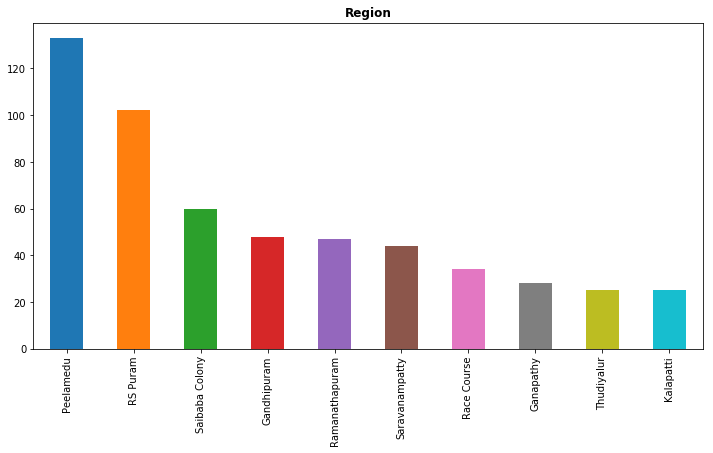

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

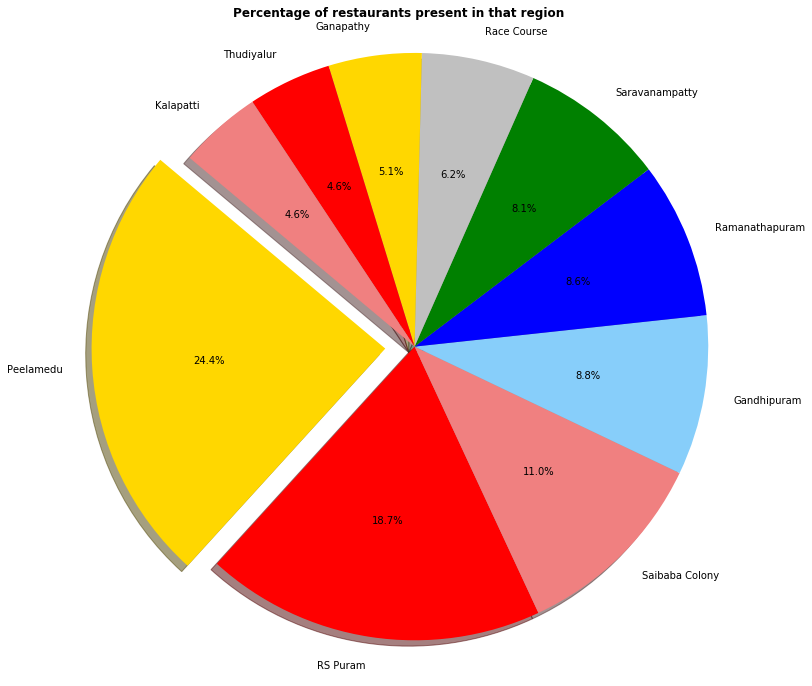

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      356
Good         253
Very Good    101
Excellent     11
Poor           3
Name: Rating_Types, dtype: int64

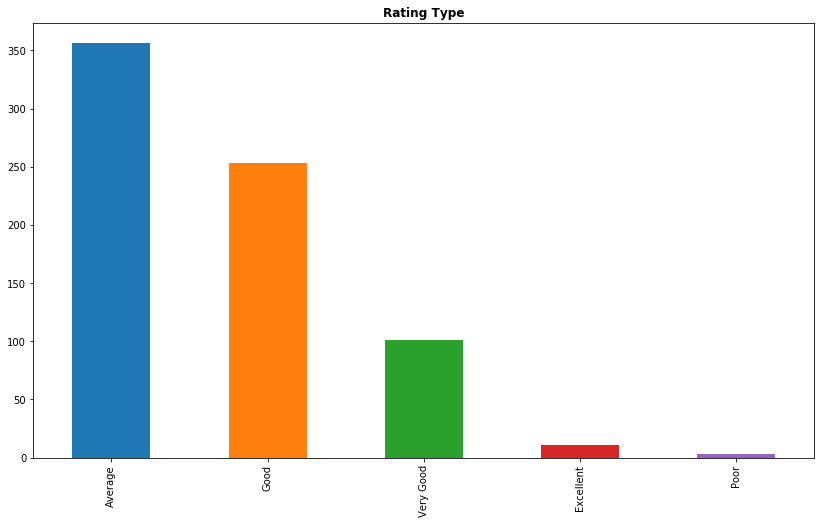

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       339
Casual Dining     173
Café               44
Dessert Parlor     44
Bakery             37
Beverage Shop      26
none               25
Mess               17
Food Court          9
Sweet Shop          4
Name: Cuisine_Type, dtype: int64

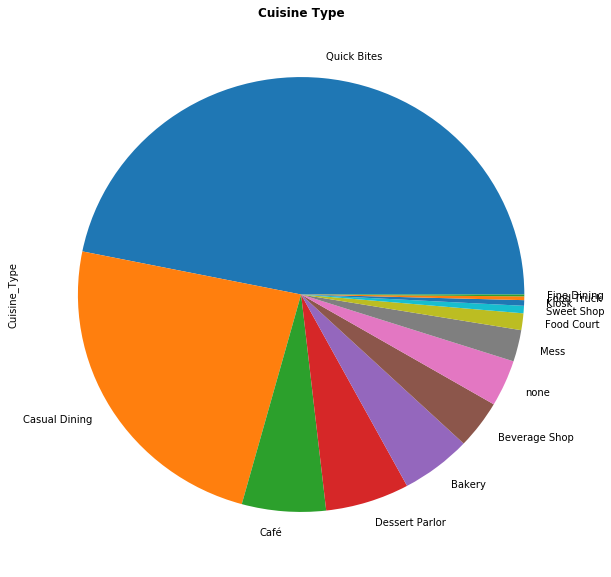

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4958506224066377


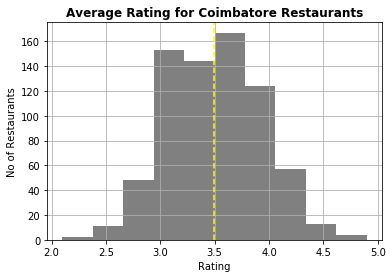

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Coimbatore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Bhopal is found to be around 3.4

# Top cuisines in Bhopal 

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

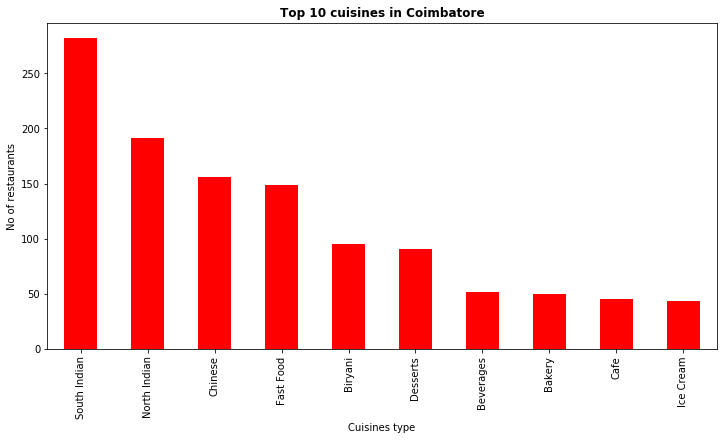

In [21]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Coimbatore',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [22]:
data['Price'].value_counts()[:20]

300     134
400     103
200      95
250      92
500      85
600      47
150      40
350      29
100      21
700      14
800      13
450      11
650       7
550       7
1200      6
1000      4
1500      4
1300      2
1400      1
282       1
Name: Price, dtype: int64

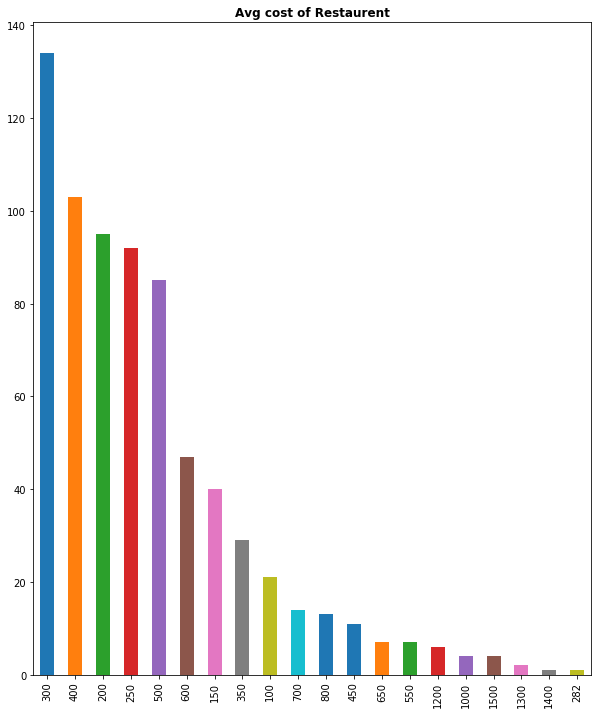

In [23]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [24]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

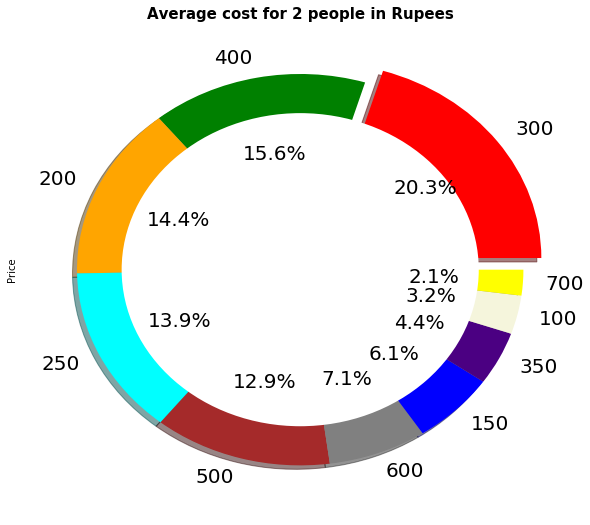

In [25]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300